<a href="https://colab.research.google.com/github/vachaconcu/Mineriadatos/blob/master/Revision_basee_finalmujer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import tarfile
from skimage import data
from os import remove
from skimage.color import rgb2gray
from numpy import load
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from sklearn.model_selection import train_test_split
from google.colab import files
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape,ZeroPadding2D,Activation,MaxPooling2D,Dropout
from keras.layers import BatchNormalization
from keras.models import Model
from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.datasets import mnist
from keras.losses import binary_crossentropy
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SpatialDropout2D
from matplotlib import pyplot as plt
import keras

Using TensorFlow backend.


In [0]:
import os

datos= load('/content/drive/My Drive/Mineria/Train-Test 90%/x_test.npz') ; X_test = datos['arr_0']
datos= load('/content/drive/My Drive/Mineria/Train-Test 90%/x_train.npz') ; X_train = datos['arr_0']
datos= load('/content/drive/My Drive/Mineria/Train-Test 90%/y_test_s.npz') ; y_test = datos['arr_0']
datos= load('/content/drive/My Drive/Mineria/Train-Test 90%/y_train_s.npz') ; y_train = datos['arr_0']

In [0]:
print('X_test =',X_test.shape)
print('X_train =',X_train.shape)
print('y_test =',y_test.shape)
print('y_train =',y_train.shape)

X_test = (1177, 200, 200, 3)
X_train = (10584, 200, 200, 3)
y_test = (1177, 2)
y_train = (10584, 2)


In [0]:
# function that filters vowels 
mujer = []
for i in range(y_train.shape[0]):
    if all(y_train[i]==[0,1]): 
      mujer.append(i)

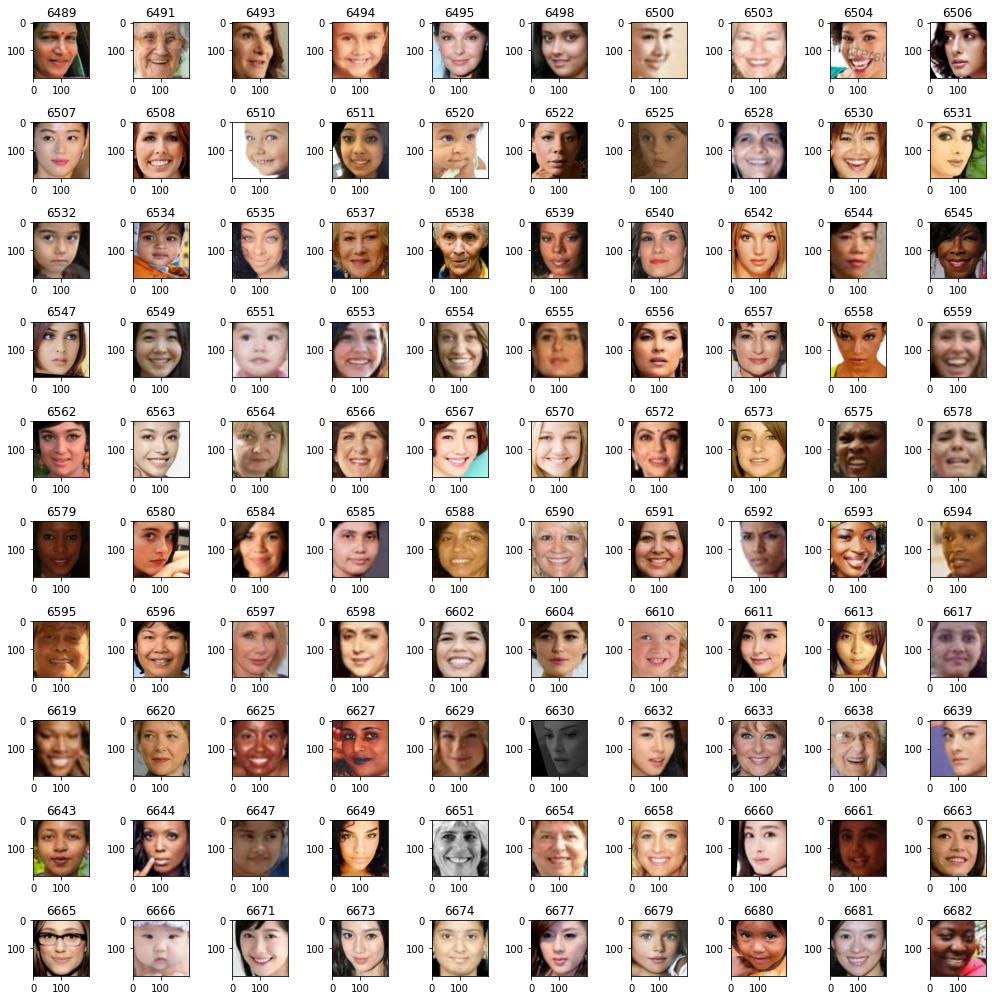

In [0]:
fig, axes = plt.subplots(10, 10, figsize=(14,14))
ax = axes.ravel()
w=0

for i in mujer[3100:3200]:
  image = np.squeeze(X_train[i])
  ax[w].imshow(image)
  ax[w].set_title(i)
  w= w+1

fig.tight_layout()
plt.show()


In [0]:
mujer[5061]

10582

In [0]:
exclude = [72,203,372,462,474,497,560,571,576,795,832,876,114,1178,1183,122,1229,1241,1245,1247,1272,1285,1305,1362,1413,1414,1424,1492,1499,1539,1542,1548,1634,1638,1643,1659,1674,1708,1758,1760,1820,1861,1908,1909,1913,1927,1929,1959,1992,2000,2043]
exclude = np.concatenate((exclude,[2081,2082,2117,2130,2135,2140,2222,2213,2226,2236,2272,2301,2307,2423,2436,2443,2490,2525,2514,2541,2544,2556,2548,2583,2593,2617,2632,2663,2677,2689,2693,2695,2713,2753,2778,2833,2829,2821,2845,2876,2894,2901,2943,2945,2924,2954,2974,2981,2996,3008,3022,3026,3029,3036,3037,3058,3099,3133,3148,3173,3165,3247,3251,3259,3264,3265,3330,3337,3343,3361,3374,3375,3409,3418,3479,3500,3522,3537,3543,3557,3560,3565,3570,3571,3584,3606,3629,3630,3637,3646,3663,3670,3673,3734,3744,3758,3768,3773,3775,3787,3799,3814,3834,3841,3868,3871,3885,3895,3819,3901,3906,3953,3976,4015,4085,4089]))
exlude = np.concatenate((exclude,[4137,4147,4180,4173,4221,4191,4291,4373,4372,4418,4453,4595,4653,4654,4665,4684,4696,4766,4774,4775,4778,4794,4844,4845,4892,4926,4928,4949,4958,4965,4978,5054,5063,5219,5224,5232,5233,5383,5422,5442,5466,5574,5757,5778,5791,5813,5839,5927,5918,6011,6102,6127,6210,6270,6274,6230,6231,6376,6378,6385,6399,6421,6439]))
exclude = np.concatenate((exclude,[6331,6330,6344,6376,6399,6404,6458,6510,6520,6559,6555,6551]))
exclude = np.concatenate((exclude,[6578,6617,6665,6685,6686,6712,6716,6749,6766,6812,6804,6825,6843,6878,6912,6929,6925,6974,6984,6992,7009,7014,7017,7052,7035,7057,7126,7111,7088,7101,7109,7114,7137,7138,7140,7153,7179,7197,7198,7209,7241,7263,7264,7271,7285,7303,7300,7313,7322,7327,7341,7383,7387,7406,7403,7499,7420,7421,7426,7437,7445,7471,7466,7490,7497,7526,7519,7542,7545,7589,7586,7594,7613,7615,7616,7619,7623,7630,7644,7651,7677,7702,7684,7722,7728,7741,7749,7753,7759,7764,7770,7777,7812,7827,7882,7887,7943,7941,7932,7949,7972,7974,8012,8005,8004,8003,7989,7984,7981,8020,8021,8058,8074,8070,8084,8094,8091,8096,8140,8152,8157,8162,8183,8173,8099,8207,8211,8216,8222,8230,8239,8246,8260,8272,8275,8277,8280,8282,8312,8309,8282,8312,8309,8297,8293,8322,8333,8348,8386,8394,8412,8425,8428,8436,8446,8451,8452,8468,8471,8491,8501,8504,8534,8535,8564,8568,8575,8591,8599,8600,8608,8615,8617,8638,8655,8661,8675,8676,8714,8711,8727,8734,8737,8740,8746,8768,8788,8789,8791,8801,8795,8806,8841,8852,8870,8882,8874,8900,8925,8933,8936,8944,8902,8979,8984,8993,9005,9022,9034,9059,9084,9113,9148,9147,9140,9138,9154,9164,9181,9157,9195,9202,9209,9229,9234,9270,9271,9275,9311,9329,9345,9359,9379,9368,9388,9413,9416,9410,9450,9452,9458,9460,9485,9495,9502,9507,9531,9551,9576,9593,9602,9624,9614,9675,9692,9701,9717,9715,9712,9708,9762,9776,9778,9798,9817,9816,9813,9825,9868,9903,9908,9968,9993,10035,10023,10040,10045,10046,10063,10056,10076,10077,10098,10114,10126,10127,10137,10154,10151,10149,10162,10186,10183,10180,10176,10192,10196,10198,10202,10209,10224,10241,10268,10273,10278,10280,10284,10293,10305,10318,10335,10340,10352,10348,10346,10364,10368,10388,10397,10436,10434,10442,10443,10445,10449,10457,10461,10468,10485,10515,10535,10576]))
exclude= np.delete(range(X_train.shape[0]), exclude)
X_train=X_train[exclude,]
y_train=y_train[exclude,]

In [0]:
exclude = [8,23,45,49,50,53,59,64,71,100,93,131,146,163,180,182,189,194,221,231,232,237,252,260,263,264,276,296,305,311,314,322,323,332,336,343,360,364,395,434,503,492,508,509,542,533,530,528,543,545,570,616,613,611,631,636,644,639,652,682,683,685,686,690,719,712,732,773,762,836,838,847,858,861,867,891,908,911,916,927,941,942,970,997,991,986,984,1004,1012,1036,1033,1038,1044,1050,1077,1078,1085,1087,1097,1093,1024,1031,1033,1036,1067,100,1055,1073]
#exclude= np.delete(range(X_test.shape[0]), exclude)
#X_test=X_test[exclude,]
#y_test=y_test[exclude,]

In [0]:
X_train = tf.constant(X_train, dtype= tf.float32)
X_test = tf.constant(X_test, dtype= tf.float32)
y_test = tf.constant(y_test, dtype= tf.float32)
y_train = tf.constant(y_train, dtype= tf.float32)

In [0]:
Modelo = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(2, activation='sigmoid')
])

In [0]:
def model(input_shape):
    # Define the input placeholder. 
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((1, 1))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(16, (3, 3),padding='same',name='Conv16')(X) 
    X = Activation('relu')(X)
    
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool_1')(X)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (3, 3),padding='same',name='Conv32')(X) 
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool_2')(X)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(64, (3, 3),padding='same',name='Conv64')(X) 
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool_3')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(2, activation='sigmoid', name='final')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='Sexo_Model')
    
    return model

In [0]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.999):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

# crea una instancia de clase
accu_callback = myCallback()

In [0]:
# Directory where the checkpoints will be saved
import os 
os.chdir("/content/drive/My Drive/Mineria")
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "model_ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True, 
    monitor='val_accuracy', mode='max',
    save_best_only=True)

In [0]:
Modelo = model((200,200,3))
Modelo.summary()

Model: "Sexo_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 202, 202, 3)       0         
_________________________________________________________________
Conv16 (Conv2D)              (None, 202, 202, 16)      448       
_________________________________________________________________
activation_1 (Activation)    (None, 202, 202, 16)      0         
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 101, 101, 16)      0         
_________________________________________________________________
Conv32 (Conv2D)              (None, 101, 101, 32)      4640      
_________________________________________________________________
activation_2 (Activation)    (None, 101, 101, 32)      0

In [0]:
Modelo.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [0]:
history = Modelo.fit(x=X_train,y=y_train, validation_data=(X_test,y_test),epochs =4 ,batch_size = 32)

Train on 10417 samples, validate on 1177 samples
Epoch 1/4
10417/10417 [==============================] - 363s 35ms/step - loss: 0.4434 - accuracy: 0.7916 - val_loss: 0.3633 - val_accuracy: 0.8381
Epoch 2/4
10417/10417 [==============================] - 362s 35ms/step - loss: 0.3096 - accuracy: 0.8665 - val_loss: 0.3038 - val_accuracy: 0.8730
Epoch 3/4
10417/10417 [==============================] - 362s 35ms/step - loss: 0.2634 - accuracy: 0.8860 - val_loss: 0.3041 - val_accuracy: 0.8751
Epoch 4/4
10417/10417 [==============================] - 361s 35ms/step - loss: 0.2252 - accuracy: 0.9055 - val_loss: 0.2775 - val_accuracy: 0.8938


In [0]:
preds = Modelo.evaluate(x = X_test,y = y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1177/1177 [==============================] - 14s 12ms/step

Loss = 0.7909142437787409
Test Accuracy = 0.8717077374458313


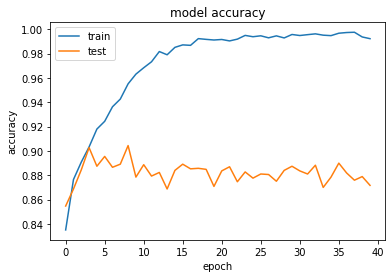

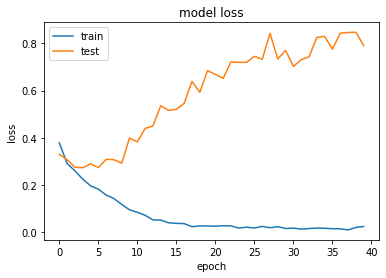

In [0]:
#print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
Modelo.save('/content/drive/My Drive/Minería de Datos/Train-Test 90%.modelo1_sexo.h5')


In [0]:
Modelo = keras.models.load_model('/content/drive/My Drive/Minería de Datos/Train-Test 90%.modelo1_sexo.h5')